# 1. 함수, 미적분Function, Calculus - 3/3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

sympy.init_printing()

## 적분integral


- 확률에 기반을 둔 머신러닝 모델들은 적분이 많이 나옴
- 표현법 위주로 리뷰
- 정적분과 부정적분의 차이를 아는 것이 매우 중요

### 부정적분

- 주어진 함수의 미분하기 전 모습<sup>anti-derivative</sup>을 찾는 미분의 역과정

- 어떤 $f(x)$가 이미 미분되었다고 생각했을 때 그 함수가 미분되기 전에는 어떤 함수였나는 다음과 같다.

$$
F(x) = \int f(x) dx + C
$$

- 상수 $C$는 $F(x)+C^*$라는 원래 함수가 미분되어 $f(x)$가 되는 과정에서 사라졌으므로 복구하지 못하는 모르는 상수 $C$이다.

- 부정적분의 의미상 $\int$ 기호는 연산적으로 아무 의미가 없는 기호이나 정적분과 어떤 연관관계로 인해 같은 기호를 쓰게 됨

- 특별한 계산 방법이 있는 것이 아니고 그냥 미분의 역과정으로 기본 공식을 생성하고 이를 이용해서 계산

- 그렇기 때문에 어떻게든 미분하기전 함수를 찾아 내기 위해 온갖 기교들이 난무함....

- 간단한 다항함수의 부정적분 예

- $\dfrac{d x^n}{dx} =  n x^{n-1}$ 의 역과정으로 $\int x^n dx = \dfrac{1}{n+1} x^{n+1} +C$임을 알 수 있다.

#### 치환적분

- 치환적분을 직접 할 일은 없지만 야코비안 개념을 알아볼 때를 위해...

 $x = g(t)$의 관계가 있을 때 

$$
\int f(x) dx = \int f\left(g(t)\right) \color{OrangeRed}{\frac{d g(t)}{dt}} dt 
$$

- 야코비안 부분에서 더 자세히

- $\int x(x^2 -1)^3 dx$ , $x = g(t) = \sqrt{t+1}$로 두면 $\frac{d g(t)}{dt} = \frac{1}{2 \sqrt{t+1}}$

$$
\begin{align}
\int x(x^2 -1)^3 dx &= \int \sqrt{t+1}  \, t^3 \color{OrangeRed}{\frac{1}{2 \sqrt{t+1}}} dt \\[5pt]
&= \frac{1}{2} \int t^3 dt = \frac{1}{8} t^4 + C \\[5pt]
&= \frac{1}{8} (x^2-1)^4 + C
\end{align}
$$

In [27]:
x = sympy.Symbol('x')

sympy.simplify(sympy.integrate(x*(x**2 - 1)**3, x))

#### 부분적분

- 역시 직접할 일은 없지만 가우시안 확률분포를 적분할 때 한번 나타남 - 암기법 : 그적미적

- 곱의 미분법으로 부터 

$$
\frac{df(x)g(x)}{dx} = \frac{df(x)}{dx}g(x) + f(x)\frac{dg(x)}{dx}
$$

- 양변의 부정적분은

$$
f(x)g(x) = \int \frac{df(x)}{dx}g(x) dx + \int f(x)\frac{dg(x)}{dx} dx 
$$

이므로 적당히 이항하면

$$
\int f(x)\frac{dg(x)}{dx} dx = f(x)g(x) - \int \frac{df(x)}{dx}g(x) dx
$$

$$
\int \frac{df(x)}{dx}g(x) dx  = f(x)g(x) - \int f(x)\frac{dg(x)}{dx} dx
$$

- $\int x \ln x \, dx $에서 $f(x)=\ln x$:그대로 적고 미분하는 함수, $\frac{dg(x)}{dx} = x$:적분하는 함수

$$
\begin{align}
\int x \ln x \, dx &= (\ln x) \frac{1}{2} x^2 - \int \frac{1}{x} \cdot \frac{1}{2} x^2  dx \\[5pt]
&=  \frac{1}{2} x^2 \ln x - \frac{1}{2}  \int x dx \\[5pt]
&= \frac{1}{2} x^2 \ln x - \frac{1}{4} x^2 +C
\end{align}
$$

In [4]:
x = sympy.Symbol('x')

sympy.integrate(x*sympy.ln(x), x)

### 몇가지 부정적분 공식(참고)

- #### 다항함수 
$$
\int x^n \, dx = \frac{1}{n+1}x^{n+1} +C
$$

$$
\int x^{-1} \, dx = \ln |x| +C
$$

- #### 지수함수

$$
\int e^x \, dx = e^x + C
$$

$$
\int a^x \, dx = \frac{a^x}{\ln a} + C
$$

- #### 로그함수(치환적분과 부분적분 이용)


$$
\int \log_{a} x \, dx = x \log_{a}x - \frac{x}{\ln a} +C
$$

$$
\int \ln x \, dx = x \ln x - x + C
$$



### 정적분

- 그래프 아래 넒이나 부피를 구하기 위해 도입된 급수를 간단히 기호로 나타낸 것

- 따라서 정적분과 부정적분은 서로 완전히 다른 개념, 부정적분 : 미분하기 전 함수를 찾는것, 정적분 : 주어진 그래프 아래의 넓이나 부피

- 다만, 미적분의 기본정리에 의해 정적분을 할 때 부정적분을 이용할 수 있음

- 정적분의 간단한 예

$$
\begin{align}
\int_{-1}^{2} \left(3x^2 - 2x +5\right) dx &= \left[x^3 -x^2 +5x\right]_{-1}^{2}\\[5pt] 
&= (2^3 - 2^2 + 10)-((-1)^3 -(-1)^2 -5) \\[5pt]
&= 14-(-7) = 21 
\end{align}
$$

$$
\int_0^1 e^x dx = \left[ e^x \right]^1_0 = e^1 - e^0  = e -1
$$

In [30]:
x = sympy.Symbol('x')

sympy.integrate(3*x**2 - 2*x +5, (x,-1, 2))

In [31]:
x = sympy.Symbol('x')

sympy.integrate(sympy.E**x, (x, 0, 1))

### 미적분의 기본정리 : 부정적분과 정적분을 연결$\dagger$

#### 미분과 정적분과의 관계
$$
\frac{d}{dx} \int_{a}^{x} f(t) dt = f(x)
$$

- 위 식의 의미 : "$f(x)$ 아래 넓이를 나타내는 함수"를 미분하면 원래 함수 $f(x)$가 된다. 따라서 "$f(x)$ 아래 넓이를 나타내는 함수"는 $f(x)$를 미분하기전 함수 즉 부정적분 중 하나가 된다.

$$
\begin{align}
\frac{d}{dx} \int_{a}^{x} f(t) dt 
&= \lim_{\Delta x \to 0} \frac{\int_{a}^{x+\Delta x} f(t) dt - \int_{a}^{x}f(t)dt}{\Delta x} \\[5pt]
&= \lim_{\Delta x \to 0} \frac{\int_{x}^{x+\Delta x} f(t) dt}{\Delta x} \\[5pt]
&= \lim_{\Delta x \to 0} \frac{f(c) \Delta x}{\Delta x} = f(x) \quad \because \Delta x \to 0 \implies c \to x
\end{align}
$$


<img src="01-function/fund-calculus-01.png"/>

- 위 계산 과정에서 첫째줄은 적분식으로 표현된 넓이함수를 미분의 정의대로 적은 것

- 여기서 분자는 함수값의 차이로 기하학적 의미는 넓이의 차

- 둘째줄은 이 넓이의 차를 적분구간을 조정해서 하나의 정적분식으로 나타낸 것

- 이 넓이의 차는 아래 그림에서 파란색 보라색 영역을 더한 것
 
- 여기서 3번째 줄로 가는 과정은 그림처럼 해당 넓이차와 동일한 넓이가 되는 직사각형을 만드는 $x < c < x+\Delta x$인 $c$가 있어서 밑변 $\Delta x$와 높이 $f(c)$를 곱한 직사각형의 넓이로 함수 아래 사다리꼴 형태의 넓이를 바꿔 적은 것



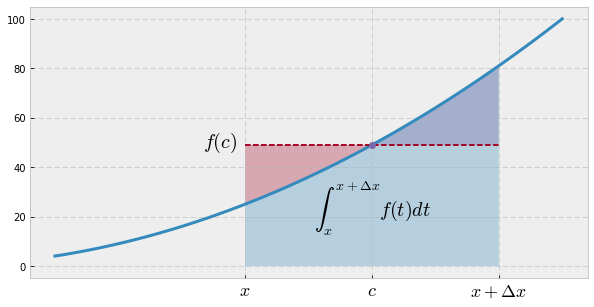

In [19]:
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(2, 10, 100) 
y = x**2 
a_itv = 5
x_itv = 9
c = (a_itv+x_itv) / 2
t  = np.linspace(a_itv, x_itv, 10)
t1 = np.linspace(a_itv, c, 10)
t2 = np.linspace(c, x_itv, 10)
dt = t[1]-t[0]
ft = t**2
ft1 = t1**2
ft2 = t2**2

fc = c**2

ax = plt.subplot(111)

ax.plot(x,y, lw=3)
ax.plot(t, np.ones(t.shape[0])*fc, '--')
ax.fill_between(t, ft, alpha=0.3)  
ax.fill_between(t1, np.ones(t1.shape[0])*fc, ft1, alpha=0.3)
ax.fill_between(t2, ft2, np.ones(t2.shape[0])*fc, alpha=0.3)
ax.plot(c, fc, 'o', ) # t 도메인에서 그림
ax.text(7, 20, r"$\int_{x}^{x+\Delta x}f(t)dt$", fontsize=20, ha='center')  
ax.text(4.6, 48, r"$f(c)$", fontsize=20, ha='center') 

# Set number of ticks for x-axis
ax.set_xticks([a_itv, c, x_itv])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '$x$'
labels[1] = '$c$'
labels[2] = '$x+\Delta x$'

ax.set_xticklabels(labels)
plt.tick_params(axis='x', which='major', labelsize=18)

plt.show()

#### 부정적분과 정적분과의 관계

$$
\int_a^b f(x) dx = \left[ F(x) \right]^b_a = F(b) - F(a)
$$

- 위 식의 의미 : 구간 $[a, b]$에서 주어진 함수 $f(x)$ 아래 넓이의 계산은 함수 $f(x)$의 부정적분을 이용해서 구할 수 있다.

- 임의의 구간 $[a, x]$에서 주어진 함수 $f(x)$의 넓이를 구해주는 함수를 $ S_{a}(x) $라고 써보자.

- 그렇다면 $b$, $c$, $d$, ...에서 부터 $x$까지 넓이를 구해주는 $S_{b}(x)$, $S_{c}(x)$등등 임의의 시작점에서 주어진 $x$까지 넓이를 구하는 무수히 많은 $S(x)$가 있다는 것을 알 수 있다.

- $ S_{a}(x) $를 정식화하기 위해 그림처럼 구간 $[a, x]$를 $n$ 등분해서 $n$개의 사각 기둥을 생각하자.

<img src="01-function/fund-calculus-02.png"/>

| 기둥의 기준점  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 기둥의 넓이  | 
|----------------|--------------|
| $t_0 = a + 0 \Delta t$  |  |
| $t_1 = a + 1 \Delta t$  | $f(t_1) \cdot \Delta t$ |
| $t_2 = a + 2 \Delta t$  | $f(t_2) \cdot \Delta t$ |
| $ \vdots $ | $\vdots$ |
| $t_n = a + n \Delta t$  | $f(t_n) \cdot \Delta t$ |

- 등분된 기둥의 넓이를 다 더하면 다음과 같다.

$$
\sum_{k=1}^{n} f(t_k) \Delta t
$$

- 이제 $ S_{a}(x) $는 다음처럼 근사되었다.

$$
S_{a}(x) \approx \sum_{k=1}^{n} f(t_k) \Delta t
$$

- $S_{a}(x)$는 $a$부터 $x$까지의 넓이이므로 정식화된 식에 $a$가 나타나도록 써보면 $\Delta t= \dfrac{x-a}{n}$이므로

$$
S_{a}(x) \approx \sum_{k=1}^{n} f\left(a+k\left\{ \frac{x-a}{n} \right\} \right)\cdot \left( \frac{x-a}{n} \right)
$$

- 처럼 $a$부터 $x$까지의 넓이를 써볼 수 있다. 이제 $\approx$으로 $=$로 만들기 위해 기둥을 무수히 많이 작게 자르고 이를 더 다하는 식으로 바꾸면

$$
S_{a}(x) = \lim_{n \to \infty} \sum_{k=1}^{n} f\left(a+k\left\{ \frac{x-a}{n} \right\} \right)\cdot \left( \frac{x-a}{n} \right)
$$

- 식을 간단히 쓰기 위해 $\int$ 기호를 도입하면

$$
S_{a}(x) = \color{OrangeRed}{ \lim_{n \to \infty} \sum_{k=1}^{n} } \color{RoyalBlue}{f\left(a+k\left\{ \frac{x-a}{n} \right\} \right)} \cdot \color{YellowGreen}{\left( \frac{x-a}{n} \right)} = \color{OrangeRed}{\int_{a}^{x}} \color{RoyalBlue}{f(t)} \, \color{YellowGreen}{dt} \tag{*}
$$

- 이것으로 넓이 함수 $S_{a}(x)$를 정식화 하였지만 아직 시그마의 극한을 찾지 않고서 위 함수의 값을 계산할 수 없다.

- 그런데 우리는 앞 과정에서 다음과 같은 사실을 알고 있다.

$$
\frac{d}{dx} \int_{a}^{x} f(t) dt = \frac{d}{dx} S_{a}(x) = f(x)
$$

- 위 사실로 인해 $S_{a}(x)$는 $f(x)$의 미분하기 전 함수중 하나와 정확히 같게 되고

$$
S_{a}(x) = F(x) + C
$$

- 따라서 $C$만 결정하면 우리는 $a$부터 $x$까지의 넓이를 주는 $S_a(x)$ 함수의 (*)와 모양이 다른 계산 가능한 함수를 얻게 된다.

- $a$부터 $a$까지의 넓이는 0이라는 사실을 이용하면 

$$
S_a(a) = F(a) + C = 0 \\[5pt]
C = -F(a)
$$

- 최종적으로

$$
S_{a}(x) = F(x) - F(a)
$$

- 이 과정을 통해 넓이를 계산하기위해 복잡한 (*)식 대신 위 식을 이용할 수 있게 된다.

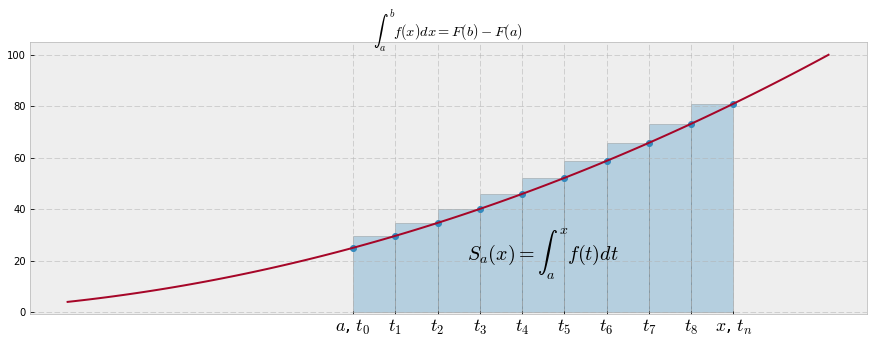

In [20]:
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (15,5)

x = np.linspace(2, 10, 100) 
y = x**2 
a_itv = 5
x_itv = 9
t = np.linspace(a_itv, x_itv, 10)
dt = t[1]-t[0]
ft = t**2

ax = plt.subplot(111)
ax.plot(t, ft, 'o', ) # t 도메인에서 그림
ax.plot(x,y)

for i in range(t.shape[0]-1):
    rect = patches.Rectangle( (t[i], 0.0), dt, ft[i+1],  facecolor='#348ABD', alpha=0.3, edgecolor='k' )
    ax.add_patch(rect)
    
ax.text(7, 20, r"$S_{a}(x) = \int_{a}^{x}f(t)dt$", fontsize=20, ha='center')    
ax.set_title(r"$\int_a^b f(x) dx = F(b) - F(a)$")
   
# Set number of ticks for x-axis
ax.set_xticks(t)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '$a$, $t_0$'
for i in range(1, 9) :
    labels[i] = '$t_{}$'.format(i)
labels[9] = '$x$, $t_n$'
ax.set_xticklabels(labels)
plt.tick_params(axis='x', which='major', labelsize=18)

plt.show()

### 다변수 함수의 정적분<sup>[8]</sup>

- 함수 $f(x,y)$는 직사각형 영역 $R:a \le x \le b, \quad c \le y \le d$에서 정의된 함수

- 영역을 작은 직사각형들로 분할 $R_1$, ... $R_n$, 그리고 이때 $\Delta x_k$, $\Delta y_k$를 $R_k$의 양변이라하면 면적은 $\Delta A_k = \Delta x_k \Delta y_k$이다.


<img src="01-function/doubleint1.png" width="500" >

- 한 작은 사각형  $R_k$ 내의 임의의 점 $(x_k, y_k)$에 대하여 

$$
S_n = \sum_{k=1}^n f(x_k, y_k) \Delta A_k
$$

- $S_n $은 그래프 아래 부피의 근사값이 된다.

- 여기서 $\lim_{n \to \infty} S_n$으로 하여 극한값이 존재하면 이를  $R$ 위에서 $f(x,y)$의 중적분<sup>double integral</sup>이라 한다.

$$
\int\int_{R} f(x,y) dA = \int\int_{R} f(x,y) dx dy
$$

- 아래 그림처럼 그래프 아래 부피를 사각 기둥으로 근사하여 다 더함.

<table>
    <tr>
        <td>
            <img src="01-function/doubleint3-1.png" width="300">
        </td>
        <td>
            <img src="01-function/doubleint3-2.png" width="300">
        </td>
    </tr>
    <tr>
        <td>
            <img src="01-function/doubleint3-3.png" width="300">
        </td>
        <td>
            <img src="01-function/doubleint3-4.png" width="300">
        </td>
    </tr>
    <tr>
        <td colspan="2">
            $n$의 크기에 따른 기둥으로 묘사된 부피<sup>[9]</sup>
        </td>
    </tr>
</table>

- 간단한 예제<sup>[8]</sup>, 실제 계산은 한 변수씩 차례로 적분해주면 된다.

$z = 3 - x - y$를 $R: 0 \le x \le 2, 0 \le y \le 1$에서 적분

$$
\begin{align}
\int_{x=0}^{x=2} \int_{y=0}^{y=1} (3 - x - y) dy dx 
&= \int_{x=0}^{x=2} \left( \int_{y=0}^{y=1} (3 - x - y) dy \right) dx \\[5pt]
&= \int_{x=0}^{x=2} \left[ 3y - xy - \frac{1}{2}y^2 \right]_{y=0}^{y=1}dx \\[5pt]
&= \int_{x=0}^{x=2} \left( \frac{5}{2} - x \right) dx \\[5pt]
&= \left[  \frac{5}{2} x - \frac{1}{2} x^2 \right]_{x=0}^{x=2} = 3
\end{align}
$$

<img src="01-function/doubleint4.png" width="450">

- 또는 순서를 바꿔서 해도 됨 (푸비니 정리)

$$
\begin{align}
\int_{y=0}^{y=1} \int_{x=0}^{x=2}  (3 - x - y)  dx  dy
&= \int_{y=0}^{y=1} \left( \int_{x=0}^{x=2} (3 - x - y) dx \right) dy \\[5pt]
&= \int_{y=0}^{y=1} \left[3x - \frac{1}{2}x^2 - yx \right]_{x=0}^{x=2}dy \\[5pt]
&= \int_{y=0}^{y=1} \left(4-2y \right) dy \\[5pt]
&= \left[ 4y - y^2  \right]_{y=0}^{y=1} = 3
\end{align}
$$

<img src="01-function/doubleint5.png" width="410">

In [3]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.integrate(3 - x - y, (x,0, 2), (y, 0, 1))

## 야코비안<sup>jacobian</sup>

- 치환적분에서 등장한 보정항에 대한 일반화


###  일변수 함수에서 치환적분과 야코비안

- $x = g(t)$의 관계가 있을 때  치환적분은 다음과 같다.

$$
\int f(x) dx = \int f\left(g(t)\right) \frac{d g(t)}{dt} dt \tag{1.1}
$$


- 위와 같이 변수를 바꿔서 적분하는 것이 원래 적분과 왜 같은지 일변수 함수의 경우 다음 그림으로 설명

<table>
<tr><td>
<img src="01-function/change-of-variable.png" alt="change-of-variable.png" width="750">
</td></tr>
<tr><td>
<span class="fig-title">1변수 함수의 치환적분</span>
</td></tr>
</table>

- $f(x)$의 원시함수 $F(x)$를 구하고자할 때 그림처럼 $F(x)$를 $x=g(t)$ 관계에 의해 $F(g(t))$로 변수변환하고 이를 미분하면 

$$
\begin{align}
\frac{d F\left(g(t)\right)}{dt} &= \frac{dF\left(g(t)\right)}{dg(t)}\frac{dg(t)}{dt} \\[5pt]
&= \frac{dF(x)}{dx}\frac{dx}{dt} \qquad \because x = g(t) \\[5pt]
&= f(x) \frac{dx}{dt} \\[5pt]
&= f \left(g(t) \right) \frac{dx}{dt} \\[5pt]
&= f \left(g(t) \right) \frac{dg(t)}{dt}
\end{align} \tag{1.2}
$$

- $F(g(t))$의 미분은 원래 함수 $f(x)$를 $x=g(t)$ 관계에 의해 $f(g(t))$로 변수 변환한 것에 $dx/dt$를 곱한 것

- 그래서 이것을 적분하여 역으로 변수변환 $t = g^{-1}(x)$ 을 해주면 $F(x)$를 구할 수 있게 된다. 

- 위 그림에서 (2)번 경로

- **변수변환한 함수 $f(g(t))$에 곱해주는 $dx/dt$을 야코비안이라고 한다.**

- 이 야코비안이 어떤 역할을 하기에 $x$에서의 적분과 $t$에서의 적분을 동일하게 하는가? 이를 다음 실습으로 확인

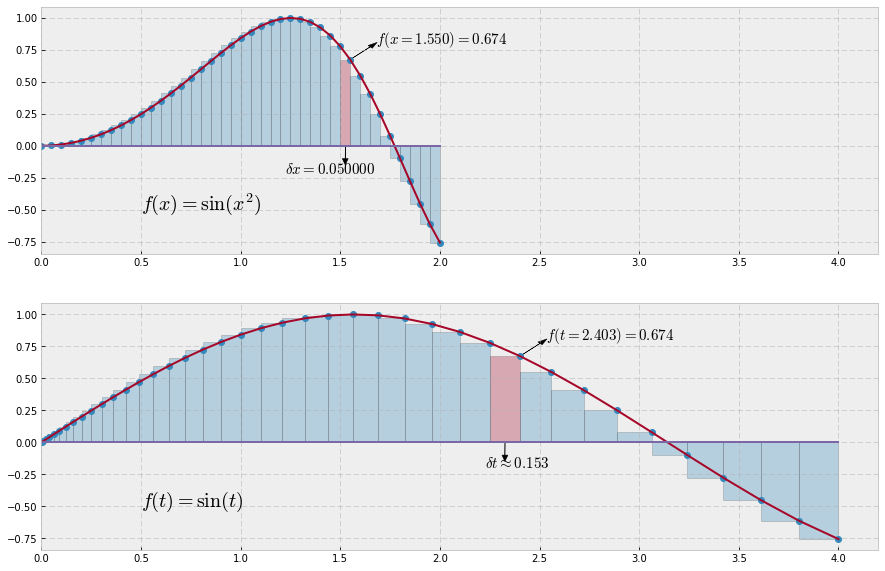

dx = 0.001 for calc.
int f(x)dx  numerical = 0.804776, approx. = 0.805
x_32=1.550, f[x_32]=0.674, dx=0.05, f[x_32]*dx=0.034


dt = [  2.5000e-07   7.5000e-07   1.2500e-06]...  for calc. is variable
int f(t)dt  numerical = 1.6536  , approx. = 1.652
t_32=2.403, f[t_32]=0.674, dt=0.153, f[t_32]*dx=0.103
J[31]=0.328
int f(t)|J|dt = 0.804


In [21]:
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (15,10)

# 그림을 위해 그래프를 40개 구간으로 자르고, 
# 수치오차를 줄여 계산하기위해 4000개로 잘라 따로 계산한다.
Ng = 41 # for graphic step
Nc = 4001 # for calc. step

x0 = 0; x1 = 2
########################################################################################
# domain x
########################################################################################
Xg = np.linspace(x0, x1, Ng) 
Xc  = np.linspace(x0, x1, Nc)
dxg = (x1 - x0) / (Ng-1) 
dxc = (x1 - x0) / (Nc-1)
fxg = np.sin(Xg**2); 
fxc = np.sin(Xc**2);

ax1 =  plt.subplot(211)
ax1.plot(Xg, fxg , 'o', Xg, fxg, Xg, np.zeros(Xg.shape)) # x 도메인에서 그림
#ax1.plot(Xg, np.ones(Xg.shape)*0.674)
ax1.arrow(Xg[31], fxg[31], 0.1, 0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax1.text(Xg[31]+0.13, fxg[31]+0.13, r"$f(x={:.3f})={:.3f}$".format(Xg[31], fxg[31]), fontdict={ 'size': 15, })
ax1.arrow((Xg[30]+Xg[31])/2, 0, 0.0, -0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax1.text((Xg[30]+Xg[31])/2-0.3, 0-0.22, r"$\delta x={:f}$".format(dxg), fontdict={ 'size': 15, })
ax1.text(0.5, -0.5, r"$f(x)=\sin(x^2)$", fontdict={ 'size': 20, })

# 32번째 점(인덱스 31), 31번째 기둥
for i in range(Xg.shape[0]-1):
    if i == 30 :
        facecolor = '#A60628'
    else :
        facecolor = '#348ABD'
    rect = patches.Rectangle( (Xg[i], 0.0), dxg, fxg[i+1], facecolor=facecolor, alpha=0.3, edgecolor='k' )
    ax1.add_patch(rect)

ax1.set_xlim([0, 4.2])


########################################################################################
#x로부터 변환된 t 도메인 스페이스
########################################################################################
Txg = Xg**2;  
Txc = Xc**2;
dtxg = np.diff(Txg); 
dtxc = np.diff(Txc)
ftxg = np.sin(Txg); 
ftxc = np.sin(Txc);

ax2 = plt.subplot(212)
ax2.plot(Txg, ftxg, 'o', Txg, ftxg, Txg, np.zeros(Txg.shape)) # t 도메인에서 그림
ax2.arrow(Txg[31], ftxg[31], 0.1, 0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax2.text(Txg[31]+0.13, ftxg[31]+0.13, r"$f(t={:.3f})={:.3f}$".format(Txg[31], ftxg[31]), fontdict={ 'size': 15, })
ax2.arrow((Txg[30]+Txg[31])/2, 0, 0.0, -0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax2.text((Txg[30]+Txg[31])/2-0.1, 0-0.2, r"$\delta t\approx{:.3f}$".format(dtxg[30]), fontdict={ 'size': 15, })
ax2.text(0.5, -0.5, r"$f(t)=\sin(t)$", fontdict={ 'size': 20, })

for i in range(Txg.shape[0]-1):
    if i == 30 :
        facecolor = style_colors[1]
    else :
        facecolor = style_colors[0]
    rect = patches.Rectangle( (Txg[i], 0.0), dtxg[i], ftxg[i+1],  facecolor=facecolor, alpha=0.3, edgecolor='k' )
    ax2.add_patch(rect)
    
ax2.set_xlim([0, 4.2])

plt.show()

# int 0~2 sin(x^2) dx = int 0~4 sin(t) [1 / 2sqrt(t)] dt  
#                                      |
#                                      -> This part is jacobian dx/dt = d sqrt(t)/dt

#print("f(x) = {}".format(fxg))
print("dx = {:.3f} for calc.".format(dxc))
xbars_c = fxc[1:]*dxc
xbars_g = fxg[1:]*dxg
print("int f(x)dx  numerical = 0.804776, approx. = {:.3f}".format((xbars_c).sum()))
print("x_32={:.3f}, f[x_32]={:.3f}, dx={}, f[x_32]*dx={:.3f}".format(Xg[31], fxg[31], dxg, xbars_g[30]))
print('\n')

print("dt = {}...  for calc. is variable".format(dtxc[:3]))
txbars_c = ftxc[1:]*dtxc
txbars_g = ftxg[1:]*dtxg
print("int f(t)dt  numerical = 1.6536  , approx. = {:.3f}".format( (txbars_c).sum()) )
print("t_32={:.3f}, f[t_32]={:.3f}, dt={:.3f}, f[t_32]*dx={:.3f}".format(Txg[31], ftxg[31], dtxg[30], txbars_g[30]))
Jc = np.abs(1/2 * 1/np.sqrt(Txc[1:]))
Jg = xbars_g / txbars_g
print("J[31]={:.3f}".format(Jg[30]))
print("int f(t)|J|dt = {:.3f}".format((txbars_c*Jc).sum()))

- 위 그림은

$$ \int_{0}^{2} \sin(x^2) dx \tag{1.3}$$

를 하기 위해 $x = g(t) = \sqrt{t}$ 로 치환하여 적분할 때 상황

- 실제 수치 적분값은 0.804776이고 4000구간으로 잘라 막대기둥의 넓이를 다 더한것이 0.805

- $t$로 변수를 바꿔서 적분

- $x = g(t) = \sqrt{t}$로 부터 $t = g^{-1}(x) = x^2$이므로 위쪽 그래프의 $x$을 모두 제곱해서 $t$로 만든다. 

- $x$ 도메인에서 일정하던 등간격이 $t$ 도메인에서는 $t$값이 커질 수록 간격이 넓어지게 됨

- 선형 관계가 아니라 비선형 즉 제곱의 관계로 변환되어서 그렇다. 

- **이렇게 변환된 $t$는 $x$가 모두 제곱되어 있는 것이므로 이를 $\sin(t)$에 넣어서 함수값을 계산하면 원래 $\sin(x^2)$와 동일한 함수값을 얻게 됨.**

- 두 경우 다 $\sin$함수에 $x$를 제곱해서 입력했기 때문

- 다만 $t$ 도메인에서 계산한 함수값은 가로축 위치가 달라져서 $t$ 도메인에서 $\sin(t)$함수는 $\sin(x^2)$를 옆으로 잡아늘린 모양이 된다.

- 구체적인 예 : 32번째 $x$, $x_{32}$ = 1.550, $f(x_{32})$= 0.674, 1.550이 제곱된 $t=$2.403에 대해서도 함수값은 여전히  $f(t=2.403)$ = 0.674인 것을 알 수 있다. 


- 이제 두 그래프의 붉은색 기둥을 보면 **높이는 같은데 밑변이 달라서 넓이가 서로 다르다.**

- 넓이를 계산해서 나누면 위 그래프의 붉은색 원기둥은 아래 그래프 붉은색 원기둥 넓이의 약 0.328배

- 각 기둥마다 대응되는 기둥의 넓이비가 모두 존재

- 따라서 그 비율을 $\sin(t)$의 각 기둥에 곱한 다음 다 더해주면 원래의 적분과 동일하게 된다는 것을 그림으로 부터 알 수 있다. 

- 그냥 다 더하면 1.652라는 값이 되어 원래 적분값보다 많이 커진다.

- 이때 넓이의 비라는 것은 대응하는 기둥의 높이는 모두 같으므로 결국 밑변의 길이비

- 이 비는 $\delta x/ \delta t$로 표시

- **이 미소변량의 길이비가 야코비안이다.** 

- 다시말해 야코비안은 작은 조각을 모두 더해서 적분할때 어떤 한 조각이 변수변환된 스페이스에서 얼마나 변했는지를 알려주는 양이다. 

- 변수변환의 관계가 선형이라면 기둥의 넓이비는 일괄적으로 2배 또는 3배처럼 상수배가 되지만 비선형일 경우 변환된 변수에 따라 그 값이 달라진다. 

- 위 그래프에서 등간격으로 잘린 $\delta x$가 $t$ 도메인으로 변환되면서 점점 더 넓어지는 현상을 통해 이를 이해할 수 있다. 

- 예시의 경우 야코비안은 다음과 같다.

$$
J = \frac{1}{2 \sqrt{t}} \tag{1.4}
$$

- 위 데모 프로그램에서 각 기둥의 야코비안을 기둥의 넓이비로 구하였는데 식(1.4)를 이용해서 붉은색 기둥의 야코비안을 직접 구하기 위해서는 기둥 밑변의 중점 위 식에 대입



In [22]:
print("{:.3f}".format(1/(2*np.sqrt((Txg[31]+Txg[30])/2))))

0.328


- 기둥의 넓이비와 동일함을 알 수 있다. 그래서 전체 적분은 다음과 같다.

$$
\int_0^2 \sin(x^2) dx = \int_0^4 \sin(t)  \frac{1}{2 \sqrt{t}}  dt \tag{1.5}
$$


- 전체적으로 보면 $\sin(t)$에 야코비안이 곱해진 또 다른 함수를 적분

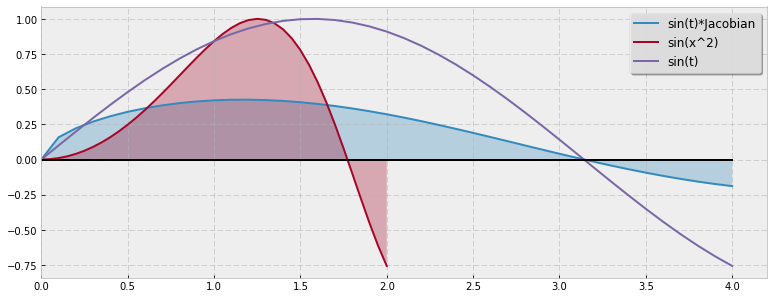

In [23]:
plt.rcParams["figure.figsize"] = (13,5)

########################################################################################
# 새로 등간격으로 생성한 t 도메인 스페이스
########################################################################################
# mapping
# x = g(t)      x = sqrt(t) ,  
# t = g_inv(x), t = x^2, 
t0 = x0**2; t1 = x1**2

Tg = np.linspace(t0, t1, Ng) + np.finfo(np.float32).eps
ftg = np.sin( np.sqrt(Tg)**2 ) 
Jg = np.abs(1/2 * 1/np.sqrt(Tg))
fJ = ftg*Jg
x_axis = np.zeros(Tg.shape)
ax = plt.subplot(111)

ax.plot(Tg, fJ,   label='sin(t)*Jacobian') 
ax.plot(Xg, fxg, label='sin(x^2)')
ax.plot(Tg, ftg, label='sin(t)')  

ax.plot(Tg, x_axis, 'k') # t 도메인에서 그림
ax.fill_between(Tg, x_axis, fJ, interpolate=True, alpha=0.3)
ax.fill_between(Xg, x_axis, fxg, interpolate=True, alpha=0.3)
ax.set_xlim([0, 4.2])

legend = plt.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()

### 다변수 함수에서 치환적분과 야코비안$\dagger$

- 많은 문서에서 설명하는 방법이 조금씩 달라서 많이 혼란스러움

- 용어부터 정리

- #### 야코비안 또는 야코비안 행렬
한 변수를 다른 변수로 매핑하는 맵(함수)를 독립변수로 미분한 행렬 즉, 다변수 벡터함수를 다변수로 미분한 것으로 행렬형태로 나타나므로 야코비안 행렬 또는 그냥 야코비안 이라고 함. $J$로 표시

- #### 야코비안 행렬식<sup>jacobian determinant</sup>
야코비안 행렬의 행렬식으로 기하학적으로 야코비안 행렬의 각 칼럼 벡터로 이루어진 도형의 넓이를 의미함. 문헌에 따라 이것을 야코비안이라고 지칭하기도 함. 이 행렬식의 값을 $J$로 표시하기도 함.

- #### $\mid J \mid$ 
야코비안 행렬식의 절대값, 정확하게는 $\mid \text{det}(J) \mid$로 써야하나 위 정의처럼 야코비안 행렬식을 그냥 야코비안으로 부르고 $J$라고 쓰는 경우는 야코비안 행렬식의 절대값을 의미하는 표시로 사용할 수 있음.


- 야코비안의 용어에 대한 위키피디아의 내용<sup>[10]</sup>

>In vector calculus, the Jacobian matrix (/dʒɪˈkoʊbiən/, /jɪˈkoʊbiən/) is the matrix of all first-order partial derivatives of a vector-valued function. When the matrix is a square matrix, both the matrix and its determinant are referred to as the Jacobian in literature.

- 적분할 함수와 변수변환의 관계를 아래와 같이 정의하고 실습을 통해 확인

$$
f(x_1, x_2) = f(\mathbf{x}) = f(x_1^2 + x_2^2) \tag{1.5}
$$

$$
x_1 = g_1(u_1, u_2) = u_1 \cos(u_2) \\[4pt]
x_2 = g_2(u_1, u_2) = u_1 \sin(u_2) \tag{1.6}
$$

- 위 예는 전형적인 직교좌표계와 극좌표계의 변환식인데 각 좌표계의 변수를 하나의 벡터변수로 쓰기위해 $x$, $u$로 표시

- 보통 직교좌표계는 $x$, $y$, 극좌표계는 $r$, $\theta$를 많이 씀

- 정의에 의해 변수변환의 관계를 나타내는 함수 $\mathbf{g}(\mathbf{u})$는 다변수 벡터함수<sup>multi valued vector function</sup>

$$
\mathbf{x}= \mathbf{g}(\mathbf{u})=
\begin{cases}
g_1(\mathbf{u}) = u_1 \cos(u_2) \\[5pt]
g_2(\mathbf{u}) = u_1 \sin(u_2)
\end{cases} \tag{1.7}
$$

- 일변수함수에서 알게된 치환적분의 공식대로 하면

- "변수를 바꾸고 변수변환의 관계식을 변환 후의 변수로 미분한 항을 곱한다"

- 다변수 함수의 경우 치환적분은 다음과 같이 되어야 할 것같다.

$$
\int \int_{D} f(x_1, x_2) dx_1 dx_2 \\= \int \int_{D^{*}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \frac{\partial \, \mathbf{g}(\mathbf{u})}{\partial \, \mathbf{u}} du_1 du_2 \tag{1.8}
$$

- 여기서 $ \dfrac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}}$은 벡터함수를 벡터변수로 미분하는 꼴이되어 결과는 행렬이 된다. <sup>[11]</sup>

- 위 식은 성립하지 않는다. 

- 일변수함수에서 사용했던 논리는 넓이를 구하기 위한 밑변의 길이비의 변화를 알아내는 것

- 이를 기하학적으로 2변수 함수에 그대로 적용하면 부피를 구하기 위한 밑면의 넓이비를 알아내야 함.

- 일변수 함수처럼 대수적으로 이해하기 힘들고 기하학적 해석을 통해 미소면적<sup>infinitesimal area</sup>넓이비를 다시 구함.

- 이를 위해 우선 그림부터 그려서 상황을 알아보자.

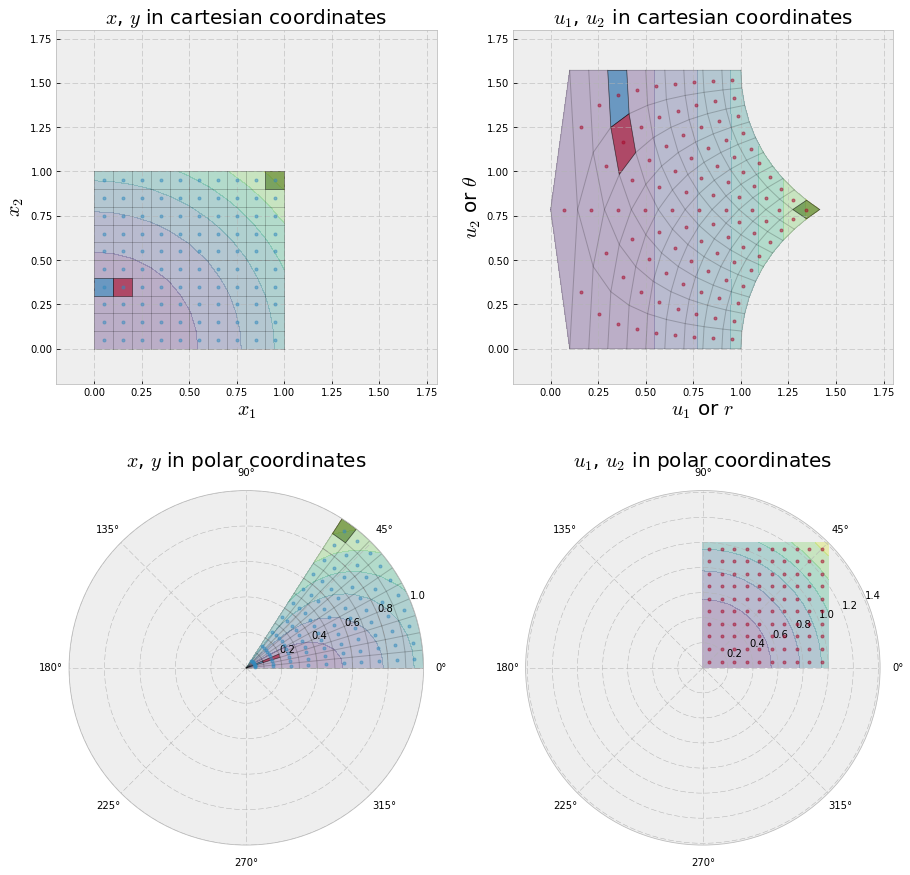

In [3]:
%matplotlib inline

from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = (15, 15)

# 적분하고자하는 영역
x1 = np.linspace(0, 1, 11) + np.finfo(np.float32).eps
x2 = np.linspace(0, 1, 11) + np.finfo(np.float32).eps

# 적분영역을 작은 사각형으로 만들었을 때 영역의 중앙
x1c = (x1[1:]+x1[:-1])/2
x2c = (x2[1:]+x2[:-1])/2

# 작은 사각형으로 분할했을때 한 변의 길이
dx = np.diff(x1)
dy = np.diff(x2)

# x-도메인의 메쉬데이터
xx1, xx2 = np.meshgrid(x1, x2)
xx1c, xx2c = np.meshgrid(x1c, x2c)

# x-도메인에서의 함수값
fx = (xx1**2 + xx2**2)

plt.subplots_adjust(hspace=0.3)

########################################################################################
# domain x
########################################################################################
ax1 = plt.subplot(221)
# 그리드와 컨투어로 영역의 바탕을 그린다.
ax1.plot(xx1, xx2, xx1.T, xx2.T, color='k',lw=1, alpha=0.2 )
ax1.contourf(xx1, xx2, fx, alpha=0.3)

# 특정 3개 영역을 색칠한다.
rect1 = patches.Rectangle( (xx1[3, 0], xx2[3, 0]), dx[0], dy[0],  facecolor='#348ABD', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect1)
rect2 = patches.Rectangle( (xx1[3, 1], xx2[3, 1]), dx[0], dy[0],  facecolor='#A60628', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect2)
rect3 = patches.Rectangle( (xx1[9, 9], xx2[9, 9]), dx[0], dy[0],  facecolor='#467821', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect3)

#영역의 중점을 그린다.
ax1.plot(xx1c, xx2c, '.', color='#348ABD', alpha=0.5)

# 좌표축 세팅 및 부가 정보 
ax1.set_xlim(-0.2,1.8)
ax1.set_ylim(-0.2,1.8)
ax1.set_xlabel(r'$x_{1}$', fontdict={ 'size': 20, })
ax1.set_ylabel(r'$x_{2}$', fontdict={ 'size': 20, })
ax1.set_title(r'$x$, $y$ in cartesian coordinates', fontdict={ 'size': 20, })

########################################################################################
# domain u
########################################################################################
ax2 = plt.subplot(222)

# x도메인의 좌표값을 아래 관계에 의해 u도메인으로 변경한다.
# x1 = g1(u1, u2) = u1 cos(u2)
# x2 = g2(u1, u2) = u1 sin(u2)
# 위 관계는 사실 극좌표와 직교좌표간의 관계이다.
# 변수 이름은 하나의 벡터로 기술하기 위해 u1, u2로 한다.
# 영역 정보
uu1 = np.sqrt(xx1**2 + xx2**2) #원점까지의 거리 r
uu2 = np.arccos(xx1/uu1)       #theta

# 영역의 중점
uu1c = np.sqrt(xx1c**2 + xx2c**2) #원점까지의 거리 r
uu2c = np.arccos(xx1c/uu1c)       #theta

# u-도메인에서 함수값을 다시 계산
fu = (uu1*np.cos(uu2))**2 +  (uu1*np.sin(uu2))**2

# 그리드와 컨투어로 영역의 바탕을 그린다.
ax2.plot(uu1, uu2, uu1.T, uu2.T, color='k',lw=1, alpha=0.2 )
ax2.contourf(uu1, uu2, fu, alpha=0.3)

# 특정 3개 영역을 색칠한다.
i,j = 3,0
verts_30 = [
    (uu1[i,j], uu2[i,j]), # 좌하
    (uu1[i,j+1], uu2[i,j+1]), # 우하 
    (uu1[i+1,j+1], uu2[i+1,j+1]), # 우상
    (uu1[i+1,j], uu2[i+1,j]), # 좌상 
    (uu1[i,j], uu2[i,j]), # 좌하
]

codes = [ Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY, ]
path = Path(verts_30, codes)
patch = patches.PathPatch(path, facecolor='#348ABD', alpha=0.6, edgecolor='k' )
ax2.add_patch(patch)

i,j = 3,1
verts_31 = [
    (uu1[i,j], uu2[i,j]), (uu1[i,j+1], uu2[i,j+1]), (uu1[i+1,j+1], uu2[i+1,j+1]), 
    (uu1[i+1,j], uu2[i+1,j]), (uu1[i,j], uu2[i,j]), 
    ]
path = Path(verts_31, codes)
patch = patches.PathPatch(path, facecolor='#A60628', alpha=0.6, edgecolor='k')
ax2.add_patch(patch)

i,j = 9,9
verts_99 = [
    (uu1[i,j], uu2[i,j]), (uu1[i,j+1], uu2[i,j+1]), (uu1[i+1,j+1], uu2[i+1,j+1]), 
    (uu1[i+1,j], uu2[i+1,j]), (uu1[i,j], uu2[i,j]), 
    ]
path = Path(verts_99, codes)
patch = patches.PathPatch(path, facecolor='#467821', alpha=0.6, edgecolor='k')
ax2.add_patch(patch)

#영역의 중점을 그린다.
ax2.plot(uu1c, uu2c, '.', color='#A60628', alpha=0.5)

# 좌표축 세팅 및 부가 정보 
ax2.set_xlim(-0.2,1.8)
ax2.set_ylim(-0.2,1.8)
ax2.set_xlabel(r'$u_1$ or $r$', fontdict={ 'size': 20, })
ax2.set_ylabel(r'$u_2$ or $\theta$', fontdict={ 'size': 20, })
ax2.set_title(r'$u_1$, $u_2$ in cartesian coordinates', fontdict={ 'size': 20, })

########################################################################################
# x in polar
########################################################################################
ax3 = plt.subplot(223, projection='polar')

ax3.plot(xx2, xx1, xx1, xx2, color='k',lw=1, alpha=0.2 )
ax3.contourf(xx2, xx1, fx, alpha=0.3)

rect1 = patches.Rectangle( (xx2[3, 0], xx1[3, 0]), dx[0], dy[0], alpha=0.6, facecolor='#348ABD', edgecolor='k' )
ax3.add_patch(rect1)
rect2 = patches.Rectangle( (xx2[3, 1], xx1[3, 1]), dx[0], dy[0], alpha=0.6, facecolor='#A60628', edgecolor='k' )
ax3.add_patch(rect2)
rect3 = patches.Rectangle( (xx2[9, 9], xx1[9, 9]), dx[0], dy[0], alpha=0.6, facecolor='#467821', edgecolor='k' )
ax3.add_patch(rect3)

ax3.plot(xx2c, xx1c, '.', color='#348ABD', alpha=0.5)
ax3.set_title(r'$x$, $y$ in polar coordinates', fontdict={ 'size': 20, })


########################################################################################
# u in polar
########################################################################################
# 진짜 극좌표계에서 적분되는 상태
ax4 = plt.subplot(224, projection='polar')

ax4.contourf(uu2, uu1, fu.T, alpha=0.3)
ax4.plot(uu2c, uu1c, '.', color='#A60628', alpha=0.5)

ax4.set_title(r'$u_1$, $u_2$ in polar coordinates', fontdict={ 'size': 20, });


- 위 그림에서 

- 색깔띠 : 함수값을 색깔로 나타낸것, 그리드 영역: 적분의 영역을 나타냄, 점:그 영역의 중간점

- 좌표 변환이 어떻게 되는지 확인하기 위해 3개의 영역의 색깔을 다르게 나타냄

- **좌상단** : $f(\mathbf{x})$를 $x_1x_2$평면에 그대로 그린것으로 적분의 영역은 $[0,1] \times [0,1]$

- **우상단** : 적분 영역 $[0,1] \times [0,1]$을 작은 정사각형으로 분할한 후 그 영역의 격자점의 $u_1$, $u_2$값(쉽게 생각해서 각점의 $r$, $\theta$값)을 계산하여 직교좌표 $u_1u_2$평면에 그린것

- **좌하단** : $x_1x_2$평면의 값을 변환없이 그대로 극좌표계에다 그린것, $x_1$은 $r$로 $x_2$는 $\theta$로 매핑함.

- **우하단** : 변환된 $u_1$, $u_2$값을 극좌표계에다 그린것 실제 변수변환하여 적분하는 상황을 나타낸 그림

- 이제 정적분을 하는 상황을 생각해보자. 

- 기본적으로 좌상단의 경우 100개의 작은 정사각형 영역에서 점으로 나타낸 중간값에서의 $f(\mathbf{x})$값을 구하여 해당 정사격형의 넓이에 곱하여 다 더하면 된다. 

- 이 값을 $V_1$이라 하자. 

- $\mathbf{g}(\mathbf{u})$에 의해 적절해 변환된 $\mathbf{u}$를 $u_1u_2$평면에 그리게 되면 이 정사각형 영역이 우상단 그림처럼 왜곡된다. 

- 이 때 격자점에서 함수값 $f(\mathbf{u})$는 변하지 않으므로 왜곡된 폴리곤의 넓이에 그 함수값을 곱해서 다 다한 $V_2$는 $V_1$과 당연히 같지 않다.

- 이 값을 서로 같게 해주는 것이 목적인데 일변수 때의 논리를 그대로 적용하면 각각 대응되는 몉면의 넓이차를 보정해주면 된다. 

- 그렇게 보정해주는 역할을 하는 것이 야코비안

- 여기까지 논리는 일변수때와 동일

- 그림에서 보면 녹색 정사각형은 왜곡이 적고 파란색과 붉은색 정사격형은 왜곡이 심해지는 것을 알 수 있다. 

- 일변수때도 아래 밑변의 길이의 변화가 오른쪽으로 갈 수록 커지는 것을 확인한바 있다. 

- 이제 이 두 밑면의 넓이에 어떤 관계가 있는지 밝히기 전에 수치적으로 두 적분이 동일한지 실험해보자.

In [25]:
def poly_area(x,y):
    """
    https://en.wikipedia.org/wiki/Shoelace_formula
    https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates
    """
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

# 적분의 정해 2/3
fxc = xx1c**2 + xx2c**2
fuc = (uu1c*np.cos(uu2c))**2 +  (uu1c*np.sin(uu2c))**2

Vfxc = fxc * dx*dy

# 왜곡된 폴리곤의 넓이를 다 계산
A = []
for i in range(10):
    for j in range(10):
        A.append(poly_area((uu1[i,j], uu1[i,j+1], uu1[i+1,j+1], uu1[i+1,j]), 
                           (uu2[i,j], uu2[i,j+1], uu2[i+1,j+1], uu2[i+1,j])))

# 왜곡된 폴리곤의 넓이 1행부터 그림상 제일 아래쪽 사각형 행이 저장되어있음
# 즉 그림상 좌하단에서 우상단 방향으로 행렬에 저장됨
# 파란 사각형이 왜곡된 넓이는 4행0열, 붉은 사각형은 4행1열에 있음
Au = np.array(A).reshape(10,10)
J = dx*dy / Au
Vfuc = fuc * J * Au # fuc * (dxdy)/Au*Au = fuc*(dxdy)

print("좌상단 그림의 격자의 넓이와 중점에서의 함수값 f(x1, x2)를 곱해서 다 더한 값 = {:.4f}".format(Vfxc.sum()))

print("우상단 폴리곤의 넓이와 좌상단 격자와의 넓이비를 폴리곤 넓이에 곱하고 그것을 중점에서의 함수값 f(u1, u2)과 곱해서 다 더한 값 = {:.4f}".format(Vfuc.sum()))
print('\n')

print("파란 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[3,0], J[3,0]))
print("붉은 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[3,1], J[3,1]))
print("녹색 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[9,9], J[9,9]))

좌상단 그림의 격자의 넓이와 중점에서의 함수값 f(x1, x2)를 곱해서 다 더한 값 = 0.6650
우상단 폴리곤의 넓이와 좌상단 격자와의 넓이비를 폴리곤 넓이에 곱하고 그것을 중점에서의 함수값 f(u1, u2)과 곱해서 다 더한 값 = 0.6650


파란 찌그러진 사각형:0.028329, 정사각형과의 넓이비 Ax/Au:0.352993
붉은 찌그러진 사각형:0.026138, 정사각형과의 넓이비 Ax/Au:0.382591
녹색 찌그러진 사각형:0.007436, 정사각형과의 넓이비 Ax/Au:1.344743


- 밑면의 넓이비를 보정하고 이를 함수값과 곱한 부피를 다 더하면 결과는 같다. 

- 각 사각형의 넓이비는 다음과 같다. 수치적으로 구한 이 넓이비가 계산된 야코비안과 같은지 나중에 다시 확인함.


In [26]:
np.set_printoptions(threshold=1000, linewidth =150)
# (0,0)의 값이 그림상 좌하단 사각형
print(J)

[[ 0.09    0.161   0.2549  0.353   0.4521  0.5517  0.6514  0.7512  0.851   0.9509]
 [ 0.161   0.2198  0.2957  0.3826  0.4751  0.5703  0.6671  0.7647  0.8629  0.9615]
 [ 0.2549  0.2957  0.3582  0.4335  0.5169  0.6054  0.6972  0.791   0.8862  0.9824]
 [ 0.353   0.3826  0.4335  0.4983  0.5728  0.6539  0.7396  0.8286  0.9199  1.0129]
 [ 0.4521  0.4751  0.5169  0.5728  0.639   0.7129  0.7923  0.876   0.9628  1.052 ]
 [ 0.5517  0.5703  0.6054  0.6539  0.7129  0.78    0.8534  0.9316  1.0137  1.0988]
 [ 0.6514  0.6671  0.6972  0.7396  0.7923  0.8534  0.921   0.9941  1.0715  1.1523]
 [ 0.7512  0.7647  0.791   0.8286  0.876   0.9316  0.9941  1.0622  1.135   1.2117]
 [ 0.851   0.8629  0.8862  0.9199  0.9628  1.0137  1.0715  1.135   1.2035  1.276 ]
 [ 0.9509  0.9615  0.9824  1.0129  1.052   1.0988  1.1523  1.2117  1.276   1.3447]]


#### 행렬식의 기하학적 의미

- 위의 넓이비를 적절히 만들어내는 야코비안 행렬을 유도하기전에 행렬의 행렬식이 가지는 기하학적인 의미에 대해 알아본다.<sup>[12]</sup> 

- 2차원 벡터 $\mathbf{u}$, $\mathbf{v}$를 열로 가지는 행렬 $\mathbf{M}$이 있을 때

$$
\mathbf{M} = \begin{bmatrix} \mathbf{u} & \mathbf{v} \end{bmatrix} =  \begin{bmatrix}
a & c \\
b & d
\end{bmatrix} 
$$

- 각 열을 두 변으로 하는 평행사변형을 생각

<table>
<tr><td>
<img src="01-function/det.png" width="450">
</td></tr>
<tr><td>
<span class="fig-title">행렬식의 기하학적 의미</span>
</td></tr>
</table>

- 위 그림처럼 구성된 평행사변형의 넓이의 반은 사각형 o, a, (a,d), d의 넓이에서 초록, 노랑, 파랑 삼각형의 넓이를 뺀 것

- 따라서 평행사변형 넓이의 반은 다음과 같다.

$$
ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}(a-c)(d-b) \\
= ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}(ad - ab- cd + cb) \\
= ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}ad + \frac{1}{2}ab + \frac{1}{2}cd - \frac{1}{2}cb \\
= \frac{1}{2} ad - \frac{1}{2}cb \\
= \frac{1}{2}(ad - bc) 
$$

- 위 결과를 2배하면 평행사변형의 넓이가 되고 이는 행렬 $\mathbf{M}$의 행렬식과 일치

- 이 결과는 평행사변형을 이루는 두 벡터를 열이 아니라 행으로 가지는 행렬에 대해서도 성립

- 그리고 열의 배치 순서에 따라 행렬식에 -1을 곱해야 넓이값과 일치하는 경우도 생길 수 있다. 

- 만약 행렬 $\mathbf{M}$을 다음과 같다면

$$
\mathbf{M} = \begin{bmatrix} \mathbf{v} & \mathbf{u} \end{bmatrix} =  \begin{bmatrix}
c & a \\
d & b
\end{bmatrix}
$$

- 행렬식은 $bc - ad$가 되고 평행사변형의 넓이는 $ad-bc>0$이므로 $ | bc - ad | = ad-bc$가 되어 평행사변형의 넓이를 표현할때는 **꼭 절대값 기호를 써줌**

#### 변수변환에 있어서 미소면적의 변화

- 문제가 정의된 좌표계가 변환 후 좌표계, 변수를 변환해서 얻게 되는 좌표계가 정규좌표계

- $u_{1}u_{2}$ 평면에서의 미소 정사각형이 $x_{1}x_{2}$ 평면에서 어떻게 변화하는지 알아본다.

- 문제는 $x_{1}x_{2}$ 좌표계에서 $u_{1}u_{2}$ 좌표계로 변환시키지만 그 변환에 따른 넓이 변화의 관계를 파악하기 위해서는 거꾸로 $u_{1}u_{2}$ 좌표계에서 $x_{1}x_{2}$ 좌표계로의 변환을 고려

- 그렇게 하지 않고 $x_{1}x_{2}$ 좌표계의 미소 정사각형이 $u_{1}u_{2}$ 좌표계에서 어떻게 변하는지를 고려하게 되면 결과적으로 야코비안 행렬의 역행렬을 구하게 됨

- 어차피 넓이의 비를 알아보려는 것이어서 어느쪽으로 해도 상관은 없음

- 여기서는 원래 야코비안을 유도하기 위해 전자의 경우를 고려

<table>
<tr><td>
<img src="01-function/jacobian.png" alt="jacobian.png" width="750">
</td></tr>
<tr><td>
<span class="fig-title">일차변환에 의한 사각형의 상</span>
</td></tr>
</table>

- 위 그림을 보면 왼쪽이 $u_{1}u_{2}$ 좌표계에서의 미소 정사각형, 마스터 엘리먼트<sup>master element</sup> $\hat{\Omega}$<sup>[13]</sup>

- 주어진 사상 $x_{1} = g_{1}(u_{1},u_{2})$, $x_{2} = g_{2}(u_{1},u_{2})$에 의해 변환된 좌표계에서 마스터 엘리먼트가 찌그러진 마름모꼴로 변환되는데 이를 $\Omega_{e}$로 두자. 

- 각 꼭지점의 색깔로 변환 과정을 알 수 있음 

- 왼쪽에서 오른쪽으로 변환을 생각

- $u_{1}u_{2}$ 좌표계에서 초록색 꼭지점의 좌표를 $(\hat{u}_{1}, \hat{u}_{2})$라 두면 노란색 꼭지점의 좌표는 $(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2})$, 파란색 꼭지점의 좌표는 $(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2})$

- 이 점들이 사상 $\mathbf{g}(\mathbf{u})$에 의해 변환된 좌표는 순서대로 $\color{Green}{(g_{1}(\hat{u}_{1}, \hat{u}_{2}), g_{2}(\hat{u}_{1}, \hat{u}_{2}))}$, $\color{Goldenrod}{(g_{1}(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2}), g_{2}(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2}))}$, $\color{RoyalBlue}{(g_{1}(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2}), g_{2}(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2}))}$

- 초록색 꼭지점을 $(\hat{x}_{1}=g_{1}(\hat{u}_{1}, \hat{u}_{2}), \hat{x}_{2}=g_{2}(\hat{u}_{1}, \hat{u}_{2}))$라 두면 

- 노란색 점의 좌표는 $\delta u_{1}$에 의해 함수 $g_{1}$과 $g_{2}$가 변화한 양만큼을 초록색 꼭지점의 좌표에 더해주면 되므로
 
$$
\text{yellow point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} +\frac{\partial g_{1}}{\partial u_2} \delta u_{2}  , \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} +\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{1.9}
$$

- 여기서 $\delta u_{2}=0$ 이므로 결과적으로 

$$
\text{yellow point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) \tag{1.10}
$$

- 같은 논리로 

$$
\text{blue point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{1.11}
$$

- 각 포인트의 좌표를 구했으므로 $\Omega_{e}$의 넓이를 구한다.

- 초록점에서 노란점으로의 벡터를 $\mathbf{v}_{y}$, 초록점에서 파란점으로의 벡터를 $\mathbf{v}_{b}$

$$
\mathbf{v}_{y} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) - (\hat{x}_{1}, \hat{x}_{2}) = \left( \frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) \\[5pt]
\mathbf{v}_{b} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) - (\hat{x}_{1}, \hat{x}_{2}) = \left( \frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{1.12}
$$

- 이 두 벡터를 열로 하는 행렬의 행렬식이 $\Omega_{e}$의 넓이

$$
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{1}}{\partial u_2} \delta u_{2} \\
\dfrac{\partial g_{2}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{2}}{\partial u_2} \delta u_{2}
\end{bmatrix} \tag{1.13}
$$

- $\Omega_{e}$의 넓이를 $S(\Omega_{e})$로 표기하기로 하고 행렬식을 구해 보면

$$
\begin{align}
S(\Omega_{e})=\text{det}\left(\,
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{1}}{\partial u_2} \delta u_{2} \\
\dfrac{\partial g_{2}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{2}}{\partial u_2} \delta u_{2}
\end{bmatrix}\,
\right)&=\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \frac{\partial g_{2}}{\partial u_2} \delta u_{2}-
\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \frac{\partial g_{2}}{\partial u_1} \delta u_{1} \\[5pt]
&=\left(\frac{\partial g_{1}}{\partial u_1} \frac{\partial g_{2}}{\partial u_2} - \frac{\partial g_{2}}{\partial u_1}\frac{\partial g_{1}}{\partial u_2}\right) \delta u_{1}\delta u_{2} \\[5pt]
&=\text{det}\underbrace{\left(\,
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} &  \dfrac{\partial g_{1}}{\partial u_2} \\
\dfrac{\partial g_{2}}{\partial u_1} &  \dfrac{\partial g_{2}}{\partial u_2}
\end{bmatrix}\,
\right)}_{\text{Jacobian Matrix, J}}  \delta u_{1}\delta u_{2}
\end{align} \tag{1.14}
$$

- 정리하면 

$$
S(\Omega_{e})= \mid \text{det}(J) \mid \delta u_{1}\delta u_{2} \tag{1.15}
$$

- 여기서 $J$는 야코비안 행렬로 다음과 같으며 이는 변환 사상 $\mathbf{g}$를 $\mathbf{u}$로 미분한 행렬

$$
J = \begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} &  \dfrac{\partial g_{1}}{\partial u_2} \\
\dfrac{\partial g_{2}}{\partial u_1} &  \dfrac{\partial g_{2}}{\partial u_2}
\end{bmatrix} =  \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}}  \tag{1.16}
$$

- 위 식(1.15)의 의미 : $u_{1}u_{2}$ 평면에서 정사각형 넓이 $\delta u_{1}\delta u_{2}$는 $x_{1}x_{2}$ 평면에서 $S(\Omega_{e})$로 왜곡되는데 그때 두 도형의 넓이 비가 $ \mid \text{det}(J) \mid $

- 한가지 더 생각해야 할 것은 변환의 비선형성이다. 

- 변환에 따라 정사각형이 평행사변형꼴로 왜곡되지 않는것이 일반적(변환이 선형변환일 때만 평행사변형으로 변환) 

- 정사각형의 크기를 매우 작게해서 어떤점 근방에서 변환의 선형근사를 생각한다면 평행사변형으로 왜곡된다고 볼 수 있다. 

- 이에 대한 동영상 설명<sup>[14]</sup> $x+\sin(y)$, $y+sin(x)$로 변환하여 전체적으로는 물결모양으로 되나 국소적으로는 평행사변형으로 선형 근사되는것을 확인

In [27]:
%%html

<iframe width="560" height="315" src="https://www.youtube.com/embed/bohL918kXQk?ecver=1" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

- 이야기를 계속하기 위해 식(1.15)를 다시 쓰면 

$$
S(\Omega_{e})= \mid \text{det}(J) \mid S \left(\hat{\Omega} \right) \tag{1.17}
$$

- 여기서 명백하게 $S(\Omega_{e}) \ne S(\hat{\Omega})$이다. 

- 이렇게 서로 다른 영역의 넓이를 $\mid \text{det}(J) \mid$가 같게 해준다는 의미인데 여기서 좌변, 즉 $S(\Omega_{e})$를 미소면적 분할에 대한 리만합으로 표현하면

$$
S(\Omega_{e}) = \int \int_{\Omega_{e}} dx_1 dx_2 \tag{1.18}
$$

- 우변 역시 미소면적 분할에 대한 리만합으로 써보면


$$
\mid \text{det}(J) \mid  S\left(\hat{\Omega}\right) = \int \int_{\hat{\Omega}} \mid \text{det}(J) \mid  du_1 du_2 \tag{1.19}
$$

- 따라서 $u_{1}u_{2}$ 평면에서 임의의 영역 $\hat{\Omega}$와 이 영역이 변환된 $x_{1}x_{2}$ 평면에서 영역 $\Omega_{e}$에 대해 각각의 면적 간에 다음과 같이 등식이 성립함을 알 수 있다.

$$
\int \int_{\Omega_{e}}  dx_1 dx_2 = \int \int_{\hat{\Omega}} \left| \text{det} \left( \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}} \right) \right| du_1 du_2 \tag{1.20}
$$

- 이제 식(1.20)으로 부터 두 영역 위에서 정의된 다변수 함수의 적분 관계를 얻을 수 있다.

$$
\int \int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \left| \text{det} \left( \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}} \right) \right| du_1 du_2 \tag{1.21}
$$

- 즉, 식(1.20)에 의해 면적이 동일하게 되는 두 적분식의 양변에 동일한 함수값을 곱해서 적분하니 결과는 당연히 같다. 

- 각 영역에서의 함수값 $f(x_1, x_2)$와 $f(g_1(u_1, u_2), g_2(u_1, u_2))$는 같다는 것을 앞서 수치적으로 확인한바 있다. 

- 이 식을 다른 표현으로 다음과 같이 쓸 수 도 있다.

$$
\int \int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \mid J \mid du_1 du_2 \tag{1.22}
$$

$$
\int\int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \left| \text{det} \left( \frac{\partial(g_1, g_2)}{\partial(u_1, u_2)} \right) \right| du_1 du_2 \tag{1.23}
$$

- 식(1.22)같은 경우는 $J$를 이미 야코비안 행렬식으로 표기한 경우이다. 

- 이 식이 바로 야코비안 행렬식이 등장하는 다변수함수에서 보게 되는 치환적분 식이다.

- 예제의 야코비안 행렬식의 값

$$
J = \begin{bmatrix}
\dfrac{\partial u_{1} \cos (u_{2})}{\partial u_{1}} & \dfrac{\partial u_{1} \cos (u_{2})}{\partial u_{2}} \\
\dfrac{\partial u_{1} \sin (u_{2})}{\partial u_{1}} & \dfrac{\partial u_{1} \sin (u_{2})}{\partial u_{2}} 
\end{bmatrix}=\begin{bmatrix}
\cos(u_{2}) & -u_{1}sin(u_{2}) \\
\sin(u_{2}) & u_{1}\cos(u_{2})
\end{bmatrix} \tag{1.24}
$$

- 행렬식 

$$
\text{det}(J) = \text{det}\left( \begin{bmatrix}
\cos(u_{2}) & -u_{1}\sin(u_{2}) \\
\sin(u_{2}) & u_{1}\cos(u_{2})
\end{bmatrix} \right) = u_{1}\cos^{2}(u_{2}) + u_{1}\sin^{2}(u_{2}) = u_{1}(\cos^{2}(u_{2}) +\sin^{2}(u_{2}))  = u_{1} \tag{1.25}
$$

- 위 그래프에서 좌상단 그래프의 정사각형이 우상단 그래프의 폴리곤으로 왜곡될때 대응되는 각 도형의 넓이비가 $u_1$

- 정말 그런가 수치적으로 구해진 넓이비와 $u_1$의 값을 비교

In [28]:
print('수치적으로 구한 두 도형의 넓이비')
print(J)
print('\n')
print('왜곡된 도형의 중점에서 u_1 값')
print(uu1c)


수치적으로 구한 두 도형의 넓이비
[[ 0.09    0.161   0.2549  0.353   0.4521  0.5517  0.6514  0.7512  0.851   0.9509]
 [ 0.161   0.2198  0.2957  0.3826  0.4751  0.5703  0.6671  0.7647  0.8629  0.9615]
 [ 0.2549  0.2957  0.3582  0.4335  0.5169  0.6054  0.6972  0.791   0.8862  0.9824]
 [ 0.353   0.3826  0.4335  0.4983  0.5728  0.6539  0.7396  0.8286  0.9199  1.0129]
 [ 0.4521  0.4751  0.5169  0.5728  0.639   0.7129  0.7923  0.876   0.9628  1.052 ]
 [ 0.5517  0.5703  0.6054  0.6539  0.7129  0.78    0.8534  0.9316  1.0137  1.0988]
 [ 0.6514  0.6671  0.6972  0.7396  0.7923  0.8534  0.921   0.9941  1.0715  1.1523]
 [ 0.7512  0.7647  0.791   0.8286  0.876   0.9316  0.9941  1.0622  1.135   1.2117]
 [ 0.851   0.8629  0.8862  0.9199  0.9628  1.0137  1.0715  1.135   1.2035  1.276 ]
 [ 0.9509  0.9615  0.9824  1.0129  1.052   1.0988  1.1523  1.2117  1.276   1.3447]]


왜곡된 도형의 중점에서 u_1 값
[[ 0.0707  0.1581  0.255   0.3536  0.4528  0.5523  0.6519  0.7517  0.8515  0.9513]
 [ 0.1581  0.2121  0.2915  0.3808  0.4743  0.5

- 실제 넓이비가 야코비안 행렬식 $u_1$값과 비슷함을 수치적인 실험으로도 확인

- 2변수 이상에서도 차원이 하나 증가할 뿐 논리는 이와 동일


## 가우스적분

- 정규분포의 정규화 상수를 이해하기 위해 필요

- 야코비안을 알기 때문에 이제 적분할 수 있다.

$$
I = \int_{-\infty}^{\infty} e^{-x^2} dx
$$

를 적분하기 위해 제곱을 해서 적분을 하면...

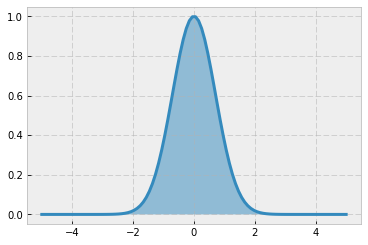

In [33]:
%matplotlib inline

x = np.linspace(-5, 5, 100)
plt.plot(x, np.exp(-x**2), lw=3)
plt.fill_between(x, x*0, np.exp(-x**2), alpha=0.5);

$$
\begin{align}
I^2 &= \int_{-\infty}^{\infty} e^{-x^2} dx \cdot \int_{\infty}^{\infty} e^{-y^2} dy \\[5pt]
&= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2 + y^2)} dx dy
\end{align}
$$

- 극좌표로 변경하기 위해 $x = r \cos \theta$, $y = r \sin \theta$로 두면 $r^2 = x^2 + y^2$ 이고

- 야코비안은

$$
\begin{align}
\mathbf{J} &= \begin{bmatrix}
\dfrac{d (r \cos \theta)}{dr} & \dfrac{d (r \cos \theta)}{d\theta} \\
\dfrac{d (r \sin \theta)}{dr} & \dfrac{d (r \sin \theta)}{d\theta} 
\end{bmatrix} = 
\begin{bmatrix}
\cos \theta & -r\sin \theta \\[5pt]
\sin \theta & r \cos \theta
\end{bmatrix} \\[5pt]
&= r \cos^2 \theta + r \sin^2 \theta \\[5pt]
&= r(\cos^2 \theta + \sin^2 \theta)=r
\end{align}
$$

이 되고 다음처럼 치환적분할 수 있다. 

$$
\begin{align}
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2 + y^2)} dx dy 
&= \int_{0}^{\infty} \int_{0}^{2\pi} e^{-r^2} r d \theta d r \\[5pt]
&= \int_{0}^{\infty} e^{-r^2} r \int_{0}^{2\pi}  d \theta d r \\[5pt]
&= 2\pi \int_{0}^{\infty} e^{-r^2} r  d r \\[5pt]
&= 2\pi \int_{0}^{\infty} e^{-u} \sqrt{u} \frac{dr}{du}  d u \qquad \because r = \sqrt{u} \\[5pt]
&= 2\pi \int_{0}^{\infty} e^{-u} \sqrt{u} \frac{1}{2\sqrt{u}}  d u \\[5pt]
&= 2\pi \int_{0}^{\infty} e^{-u} \frac{1}{2}  d u \\[5pt]
&= \pi \int_{0}^{\infty} e^{-u} du \\[5pt]
&= \pi \left[ -e^{-u} \right]_{0}^{\infty} \\[5pt]
&= \pi \left[ 0 - (-1) \right] = \pi
\end{align}
$$

$$
\therefore \, I = \sqrt{\pi}
$$

- 상수가 곱해진 경우, 동일한 과정으로 하고 $r = \sqrt{u/a}$ 로 치환하면 됨
$$
\int_{-\infty}^{\infty} e^{-ax^2} dx = \sqrt{\frac{\pi}{a}}
$$

In [47]:
from sympy import oo

x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.integrate(sympy.E**(-x**2), (x, -oo, oo))

## 이것만은 기억하기

- 일변수 실함수 : 지수함수, 로그의 의미와 로그함수

- 다변수 실함수 : 모양과 의미

- 합성함수 미분, 미분의 연쇄법칙

- 야코비안의 대강의 의미

## 참고문헌

1. Scalars and Vectors, http://www.physicsclassroom.com/class/1DKin/Lesson-1/Scalars-and-Vectors

2. https://ko.wikipedia.org/wiki/함수

3. 벡터 미적분학, 곽도영,서동엽,임진환,진교택, 경문사

4. https://ko.wikipedia.org/wiki/음함수와_양함수

5. Surface Modeling for CAD/CAM - Advanced in Industrial Engineering, Byoung K. Choi, Elsevier

6. Unit normal vector of a surface, https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/flux-in-3d-articles/a/unit-normal-vector-of-a-surface

7. Derivative#Notation_(details): https://en.wikipedia.org/wiki/Derivative

8. Thomas' Calculus, Giordano, Weir, Finney, Pearson

9. Riemann 합의 3D 시각화, https://www.wolfram.com/mathematica/new-in-8/new-and-improved-scientific-and-information-visualization/visualize-3d-riemann-sums.html

10. Jacobian matrix and determinant, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

11. 벡터, 행렬에 대한 미분Derivatives for vectors and matrices, https://metamath1.github.io/2018/01/02/matrix-derivatives.html

12. 행렬식의 기하학적 의미 , https://wikidocs.net/4049

13. Finite Elements vol.1 An Introduction, Eric B. Becker, Graham F. Carey, J. Tinsley Oden, Prentice-Hall

14. The Jacobian matrix, Khan Academy, https://youtu.be/bohL918kXQk?t=1m15s


In [2]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    table { font-family: 'Noto Sans KR' !important;  font-size: 13pt !important; }     
    p  { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%; }
    li > p { text-indent: 0px; }
    /* blockquote > p { font-family: 'Georgia','Nanum Myeongjo' !important; font-size: 12pt !important; } */
    sup { font-family: 'Georgia'; } 
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .fig-title { font-family: 'Noto Sans KR'; font-size: 10pt;}
    .summary {font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
              border-left:3px solid #FF0000;padding-left:20px;margin-top:10px; }
</style>